In [27]:
#https://fxdata.cloud/tutorials/a-guide-for-time-series-forecasting-with-arima-in-python-3
#https://machinelearningmastery.com/arima-for-time-series-forecasting-with-python/
#change Server=your server name in SQL management studio
%matplotlib inline
import pyodbc 
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt

cnxn = pyodbc.connect("Driver={SQL Server Native Client 11.0};"
                      "Server=DESKTOP-556NPKF;"
                      "Database=AdventureWorks2012;"
                      "Trusted_Connection=yes;")

In [28]:
#df = pd.read_sql_query(""" 
#SELECT A.[SalesOrderID]
#,A.[LineTotal]
#,B.[OrderDate]
#,C.[Name]
#FROM [Sales].[SalesOrderDetail] AS A
#LEFT JOIN [Sales].[SalesOrderHeader] AS B
#ON A.SalesOrderID = B.SalesOrderID
#LEFT JOIN [Sales].[SalesTerritory] AS C
#ON B.TerritoryID = C.TerritoryID
#WHERE C.[Name]""", cnxn)

In [29]:
#List of regions
#Northwest, Northeast, Central, Southwest, Southeast, Canada, France, Germany, Australia, United Kingdom

In [30]:
df = pd.read_sql_query(""" 
SELECT
A.[LineTotal]
,B.[OrderDate]
FROM [Sales].[SalesOrderDetail] AS A
LEFT JOIN [Sales].[SalesOrderHeader] AS B
ON A.SalesOrderID = B.SalesOrderID
LEFT JOIN [Sales].[SalesTerritory] AS C
ON B.TerritoryID = C.TerritoryID
WHERE C.[Name] = 'Australia'
""", cnxn)

In [31]:
df.head(5)

,LineTotal,OrderDate
0,3399.99,2005-07-01
1,3578.27,2005-07-02
2,3374.99,2005-07-02
3,3399.99,2005-07-02
4,3578.27,2005-07-03


In [32]:
df = df.set_index(['OrderDate'])

In [33]:
#Summarise the transactions by order month
# The 'MS' string groups the data in buckets by start of the month
y = df['LineTotal'].resample('MS').sum()

In [34]:
y.head(5)

OrderDate
2005-07-01    209652.9046
2005-08-01    222538.2892
2005-09-01    173993.5128
2005-10-01    217993.3828
2005-11-01    210683.5628
Freq: MS, Name: LineTotal, dtype: float64

In [35]:
# The term bfill means that we use the value before filling in missing values
y = y.fillna(y.bfill())


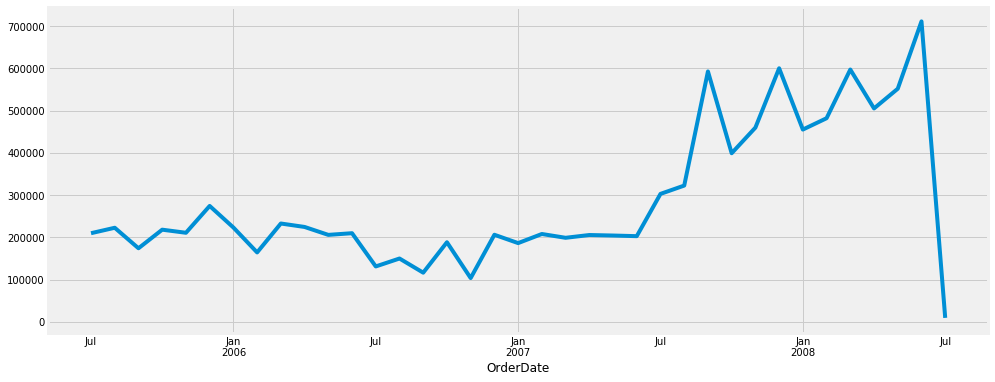

In [36]:
y.plot(figsize=(15, 6))
plt.show()

In [37]:
import itertools
# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 2)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [38]:
import warnings
import statsmodels.api as sm
warnings.filterwarnings("ignore") # specify to ignore warning messages

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:1020.1085767983276
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:nan
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:669.3382870172902
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:691.4120029648876
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:nan
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:365.2348308982221
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:30945.592994347913
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:475759.2445447875
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:634.6974719238226
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:696.4115247476312
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:641.3661501607879
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:361.1223386276114
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:934.3807812450605
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:632.6011642096252
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:647.9756459340706
ARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:327.67417968623187
ARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC:902.3166077882656
ARIMA(0, 1, 1)x(0, 1, 0, 12)12 - AIC:600.5648356718694
ARIMA(0, 1, 1)x(1, 0, 0, 12)12 - AI

In [39]:
best_aic = np.inf
best_pdq = None
best_seasonal_pdq = None
tmp_model = None
best_mdl = None
 
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            tmp_mdl = sm.tsa.statespace.SARIMAX(y,
                                                order = param,
                                                seasonal_order = param_seasonal,
                                                enforce_stationarity=True,
                                                enforce_invertibility=True)
            res = tmp_mdl.fit()
            if res.aic < best_aic:
                best_aic = res.aic
                best_pdq = param
                best_seasonal_pdq = param_seasonal
                best_mdl = tmp_mdl
        except:
            
            continue
print("Best SARIMAX{}x{}12 model - AIC:{}".format(best_pdq, best_seasonal_pdq, best_aic))

Best SARIMAX(1, 1, 0)x(0, 1, 0, 12)12 model - AIC:652.7081487873729


In [40]:
# print statistics
print(res.aic)
print(res.summary())

654.4182875087831
                                 Statespace Model Results                                 
Dep. Variable:                          LineTotal   No. Observations:                   37
Model:             SARIMAX(1, 1, 1)x(0, 1, 0, 12)   Log Likelihood                -324.209
Date:                            Wed, 03 Oct 2018   AIC                            654.418
Time:                                    20:26:38   BIC                            657.952
Sample:                                07-01-2005   HQIC                           655.356
                                     - 07-01-2008                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5262      0.860     -0.612      0.540      -2.211       1.159
ma.L1         -0.

In [41]:
plt.style.use('fivethirtyeight')
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 0),
                                seasonal_order=(1, 1, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

In [42]:
# print statistics
#print(result.aic)
#print(result.summary())

In [43]:
from scipy.stats import chi2
chi = chi2.isf(q=0.05, df=116)
chi

142.13816003902645

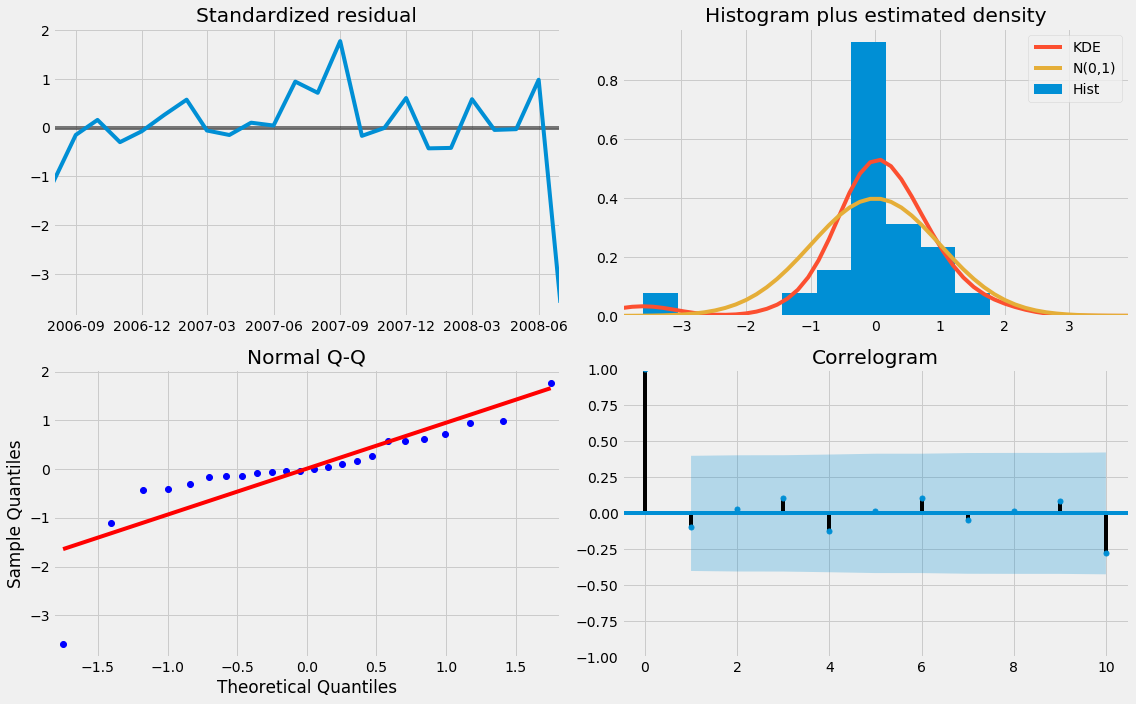

In [44]:
res.plot_diagnostics(figsize=(16, 10))
plt.tight_layout()
plt.show()

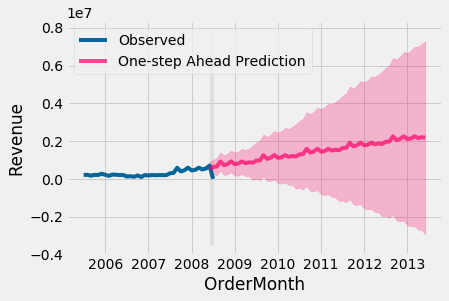

In [45]:
# in-sample-prediction and confidence bounds
pred = res.get_prediction(start=pd.to_datetime('2008-06-01'), 
                          end=pd.to_datetime('2013-06-01'),
                          dynamic=True)
pred_ci = pred.conf_int()
 
# plot in-sample-prediction
ax = y.plot(label='Observed',color='#006699');
pred.predicted_mean.plot(ax=ax, label='One-step Ahead Prediction', alpha=.7, color='#ff0066');
 
# draw confidence bound (gray)
ax.fill_between(pred_ci.index, 
                pred_ci.iloc[:, 0], 
                pred_ci.iloc[:, 1], color='#ff0066', alpha=.25);
 
# style the plot
ax.fill_betweenx(ax.get_ylim(), pd.to_datetime('2008-06-01'), y.index[-1], alpha=.15, zorder=-1, color='grey');
ax.set_xlabel('OrderMonth')
ax.set_ylabel('Revenue')
plt.legend(loc='upper left')
plt.show()

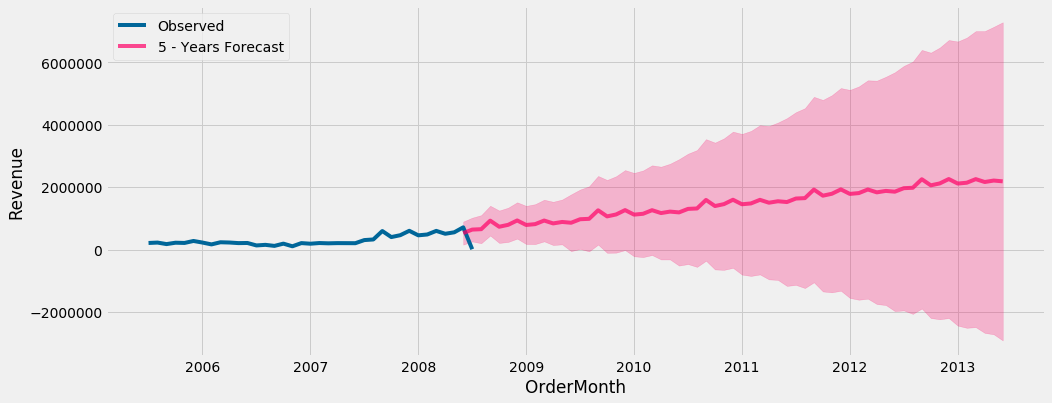

In [46]:
#pred.predicted_mean
# plot in-sample-prediction
ax = y.plot(label='Observed',color='#006699');
pred.predicted_mean.plot(figsize=(15, 6),label='5 - Years Forecast', alpha=.7, color='#ff0066')
# draw confidence bound (gray)
ax.fill_between(pred_ci.index, 
                pred_ci.iloc[:, 0], 
                pred_ci.iloc[:, 1], color='#ff0066', alpha=.25);
#y.plot(figsize=(15, 6))
ax.set_xlabel('OrderMonth')
ax.set_ylabel('Revenue')
plt.legend(loc='upper left')
plt.show()

In [47]:
all_dfs = [y, pred.predicted_mean]

In [48]:
df = pd.DataFrame(np.array(pd.concat(all_dfs).reset_index(drop=False)), columns =  ['Month', 'Revenue'])

In [49]:
df = df.set_index(['Month'])

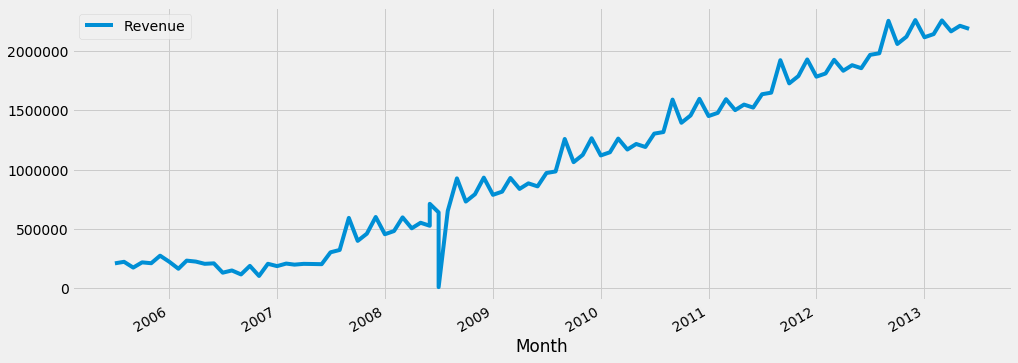

In [50]:
#df.plot(label='Revenue',color='#006699');
df.plot(figsize=(15, 6))

In [51]:
df.head(5)

,Revenue
Month,
2005-07-01,209653
2005-08-01,222538
2005-09-01,173994
2005-10-01,217993
2005-11-01,210684


In [52]:
df.tail(5)

,Revenue
Month,
2013-02-01,2.14105e+06
2013-03-01,2.25634e+06
2013-04-01,2.16425e+06
2013-05-01,2.21091e+06
2013-06-01,2.18554e+06
